In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2025-05-01 03:35:04.486771: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train = x_train.astype("float32") / 255.0

In [4]:
x_test = x_test.astype("float32") / 255.0

In [5]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

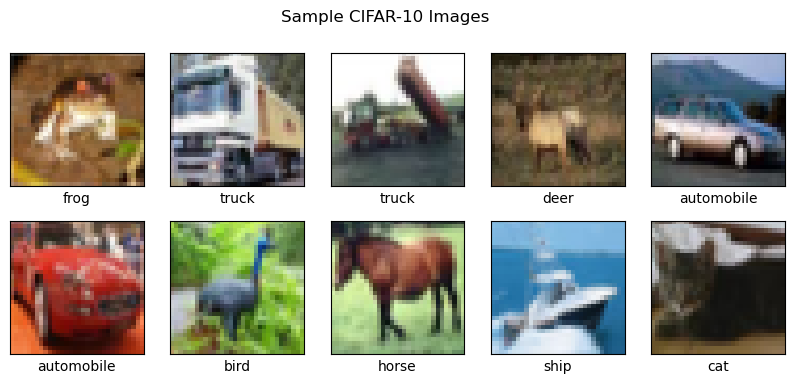

In [6]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.suptitle("Sample CIFAR-10 Images")
plt.show()

In [7]:
from tensorflow.keras import layers, models


In [20]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=x_train.shape[1:]),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # layers.Dropout(0.5),
    # layers.Dense(32, activation='relu'),
    # layers.Dropout(0.5),  # Drop 50% of units randomly during training
    layers.Dense(10, activation='softmax')
])

/opt/conda/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test),
                    batch_size=200)

Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 56s 220ms/step - accuracy: 0.2815 - loss: 1.9370 - val_accuracy: 0.4537 - val_loss: 1.5099
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 210ms/step - accuracy: 0.4816 - loss: 1.4332 - val_accuracy: 0.5262 - val_loss: 1.3262
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 220ms/step - accuracy: 0.5512 - loss: 1.2563 - val_accuracy: 0.5829 - val_loss: 1.1788
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 79s 208ms/step - accuracy: 0.5940 - loss: 1.1546 - val_accuracy: 0.6081 - val_loss: 1.1055
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 84s 216ms/step - accuracy: 0.6242 - loss: 1.0696 - val_accuracy: 0.6446 - val_loss: 1.0259
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - accuracy: 0.6556 - loss: 0.9901 - val_accuracy: 0.6575 - val_loss: 0.9773
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 217ms/step - accuracy: 0.6770 - loss: 0.9377 - val_accuracy: 0.6596 - val_loss: 0.9641
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 53s 211ms/step - accuracy: 0.6856 - loss: 0

In [18]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")


313/313 - 3s - 10ms/step - accuracy: 0.5526 - loss: 1.2654
Test accuracy: 0.55


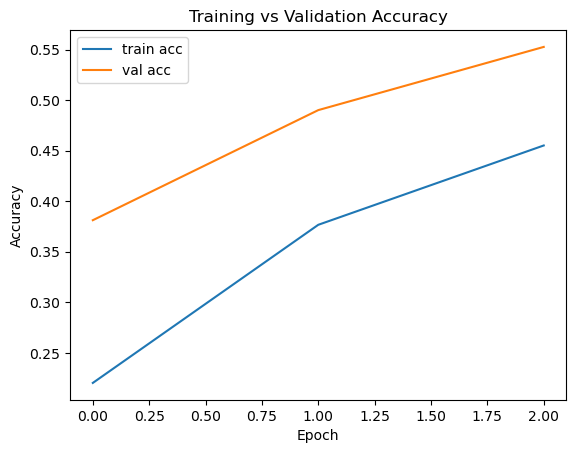

In [19]:
# Accuracy plots
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()
